In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import sys
#import bbknn
from statsmodels import robust
import matplotlib.pyplot as plt
import os.path
import anndata
#import harmonypy as hm

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.settings.set_figure_params(dpi=80, color_map='viridis')
#sc.logging.print_versions()

In [11]:
#path1="/lustre/scratch127/cellgen/cellgeni/tickets/tic-2769/work/Sanger/gex/"

In [12]:
#path2= "/output/Gene/filtered"

In [2]:
path1="/lustre/scratch127/cellgen/cellgeni/tickets/tic-2769/work/Sanger/gex/cellbender/"

In [3]:
path2= "/cellbender_out/"

In [4]:
file_path=('/lustre/scratch126/cellgen/team298/ab72/CTCL/skin_info.csv')

In [5]:
samples = pd.read_csv(file_path)

In [6]:
samples

,irods/farm,Sample_type,Donor,Sample_id,Tissue,Site,Sex
0,4820STDY7388991,healthy_skin,S1,4820STDY7388991,Dermis,non_lesion,Female
1,4820STDY7388992,healthy_skin,S1,4820STDY7388992,Dermis,non_lesion,Female
2,4820STDY7388993,healthy_skin,S1,4820STDY7388993,Dermis,non_lesion,Female
3,4820STDY7388994,healthy_skin,S1,4820STDY7388994,Dermis,non_lesion,Female
4,4820STDY7388995,healthy_skin,S1,4820STDY7388995,Epidermis,non_lesion,Female
...,...,...,...,...,...,...,...
131,CTCL3_GEX_4,CTCL,CTCL3,CTCL3_GEX_4,Epidermis,lesion,Female
132,CTCL4_GEX_1,CTCL,CTCL4,CTCL4_GEX_1,Dermis,lesion,Male
133,CTCL4_GEX_2,CTCL,CTCL4,CTCL4_GEX_2,Dermis,lesion,Male
134,CTCL4_GEX_3,CTCL,CTCL4,CTCL4_GEX_3,Epidermis,lesion,Male


In [34]:
#import os

# Directory path
#directory_path = '/lustre/scratch127/cellgen/cellgeni/tickets/tic-2769/work/Sanger/gex/'

# Get list of all subdirectories
#sub = [name for name in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, name))]

#sub=[item for item in sub if item not in ['logs', 'cellbender']]



In [7]:
import os

# Directory path
directory_path = '/lustre/scratch127/cellgen/cellgeni/tickets/tic-2769/work/Sanger/gex/cellbender/'

# Get list of all subdirectories
sub = [name for name in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, name))]



In [8]:
sample_filt = samples.loc[samples['irods/farm'].isin(sub)]


In [9]:
column_list=sample_filt['irods/farm'].tolist()

In [10]:
path= [path1+name+path2 for name in column_list]

In [11]:
sample_filt['path']= path
sample_filt

/tmp/ipykernel_524030/2675726948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_filt['path']= path


,irods/farm,Sample_type,Donor,Sample_id,Tissue,Site,Sex,path
96,WSSS_SKN8090612,CTCL,CTCL1,CTCL1_GEX_1,Epidermis,lesion,Female,/lustre/scratch127/cellgen/cellgeni/tickets/ti...
97,WSSS_SKN8090613,CTCL,CTCL1,CTCL1_GEX_2,Epidermis,lesion,Female,/lustre/scratch127/cellgen/cellgeni/tickets/ti...
98,WSSS_SKN8090614,CTCL,CTCL1,CTCL1_GEX_3,Dermis,lesion,Female,/lustre/scratch127/cellgen/cellgeni/tickets/ti...
99,WSSS_SKN8090615,CTCL,CTCL1,CTCL1_GEX_4,Dermis,lesion,Female,/lustre/scratch127/cellgen/cellgeni/tickets/ti...
100,WSSS_SKN10827890,CTCL,CTCL5,CTCL5_Derm_45N_G,Dermis,lesion,Male,/lustre/scratch127/cellgen/cellgeni/tickets/ti...
101,WSSS_SKN10827891,CTCL,CTCL5,CTCL5_Derm_45P_8N_G,Dermis,lesion,Male,/lustre/scratch127/cellgen/cellgeni/tickets/ti...
102,WSSS_SKN10827892,CTCL,CTCL5,CTCL5_Derm_45P_8Pr_G,Dermis,lesion,Male,/lustre/scratch127/cellgen/cellgeni/tickets/ti...
103,WSSS_SKN10827893,CTCL,CTCL5,CTCL5_Epi_45N_G,Epidermis,lesion,Male,/lustre/scratch127/cellgen/cellgeni/tickets/ti...
104,WSSS_SKN10827894,CTCL,CTCL5,CTCL5_Epi_45P_8N_G,Epidermis,lesion,Male,/lustre/scratch127/cellgen/cellgeni/tickets/ti...
105,WSSS_SKN10827895,CTCL,CTCL5,CTCL5_Epi_45P_8Pr_G,Epidermis,lesion,Male,/lustre/scratch127/cellgen/cellgeni/tickets/ti...


In [12]:
sample_filt.to_csv('/lustre/scratch126/cellgen/team298/ab72/CTCL/Info_CTCL_processed_with_path_cellbender.csv')

In [13]:
# Initialize a list to store Adata objects
adata_list = []

# Iterate over each row in the DataFrame
for index, row in sample_filt.iterrows():
    # Read Adata file
    adata = sc.read_10x_mtx(row['path'])

    # add sample_type and donor
    adata.obs['sample_type'] = row['Sample_type']
    adata.obs['Donor'] = row['Donor']
    adata.obs['Sanger_ID'] = row['irods/farm']
    adata.obs['tissue'] = row['Tissue']
    adata.obs['site'] = row['Site']
    adata.obs['Sex'] = row['Sex']
    
    adata.obs_names_make_unique()
    adata.var_names_make_unique()
    
    # Append the Adata object to the list
    adata_list.append(adata)

# Concatenate all Adata objects
concatenated_adata = adata_list[0].concatenate(adata_list[1:])


--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading fr

/tmp/ipykernel_524030/1727816446.py:24: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  concatenated_adata = adata_list[0].concatenate(adata_list[1:])


In [13]:
concatenated_adata.write_h5ad('/lustre/scratch126/cellgen/team298/ab72/CTCL/ctcl_cellbender_raw_by_pasha_17_5.h5ad')

In [14]:
adata

AnnData object with n_obs × n_vars = 737280 × 36601
    obs: 'sample_type', 'Donor', 'Sanger_ID', 'tissue', 'site', 'Sex'
    var: 'gene_ids', 'feature_types'

In [121]:
#adata=sc.read('/lustre/scratch126/cellgen/team298/ab72/CTCL/ctcl_raw_by_pasha_2_5.h5ad')

In [7]:
adata=sc.read('/lustre/scratch126/cellgen/team298/ab72/CTCL/ctcl_cellbender_raw_by_pasha_15_5.h5ad')

In [16]:
concatenated_adata.obs['n_counts'] = concatenated_adata.X.sum(axis=1).A1

In [17]:
adata = concatenated_adata[concatenated_adata.obs['n_counts'] > 1, :].copy()

In [19]:
adata.write_h5ad('/lustre/scratch126/cellgen/team298/ab72/CTCL/ctcl_cellbender_raw_by_pasha_17_5.h5ad')

In [19]:
adata.obs['n_counts'].value_counts()

n_counts
1558.0     81
1235.0     79
1648.0     77
1376.0     77
1646.0     77
           ..
17368.0     1
23866.0     1
21090.0     1
14756.0     1
47844.0     1
Name: count, Length: 26190, dtype: int64

In [18]:
adata.obs['Donor']=adata.obs['Donor'].astype(str)
adata.obs['Sanger_ID']=adata.obs['Sanger_ID'].astype(str)
adata.obs['donor_lane']= adata.obs['Donor'] + "_" + adata.obs['Sanger_ID']

/tmp/ipykernel_2512786/2340965974.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Donor']=adata.obs['Donor'].astype(str)


In [20]:
RUNs, DSs, CELLs, THRs, MEDs, MADs, CUTs, no_thr = [], [], [], [], [], [], [], []

for run in adata.obs['Sanger_ID'].unique():
    print(run)
    ad = adata[adata.obs['Sanger_ID'] == run, :]
    x = ad.X
    scrub = scr.Scrublet(x)
    ds, prd = scrub.scrub_doublets()
    RUNs.append(run)
    DSs.append(ds)
    CELLs.append(ad.obs_names)
    # MAD calculation of threshold:
    MED = np.median(ds)
    MAD = robust.mad(ds)
    CUT = (MED + (4 * MAD))
    MEDs.append(MED)
    MADs.append(MAD)
    CUTs.append(CUT)

    try:  # not always can calculate automatic threshold
        THRs.append(scrub.threshold_)
        print('Threshold found by scrublet')
    except:
        THRs.append(0.4)
        no_thr.append(run)
        print('No threshold found, assigning 0.4 to', run)
        scrub.call_doublets(threshold=0.4) # so that it can make the plot
    fig = scrub.plot_histogram()
    fig[0].savefig(run + '.png')
    
    
    scrub.call_doublets(threshold=CUT)
    fig = scrub.plot_histogram()
    fig[0].savefig(run + '_mad_' + '.png')
    plt.close('all')
    print()
    print()

WSSS_SKN8090612
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.51
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 5.8%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 6.9%
Elapsed time: 14.8 seconds
Threshold found by scrublet
Detected doublet rate = 2.2%
Estimated detectable doublet fraction = 21.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 10.3%


WSSS_SKN8090613
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.66
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 4.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 4.2%
Elapsed time: 3.5 seconds
Threshold found by scrublet
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 8.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 

In [21]:
ns = np.array(list(map(len, DSs)))

In [22]:
tbl = pd.DataFrame({
    'run': np.repeat(RUNs, ns),
    'ds': np.concatenate(DSs),
    'thr': np.repeat(THRs, ns),
    'mad_MED': np.repeat(MEDs, ns),
    'mad_MAD': np.repeat(MADs, ns),
    'mad_thr': np.repeat(CUTs, ns),
    }, index=np.concatenate(CELLs))

tbl['auto_prd'] = tbl['ds'] > tbl['thr']
tbl['mad_prd'] = tbl['ds'] > tbl['mad_thr']

In [23]:
adata.obs['mad_prd']=tbl['mad_prd']
adata.obs['ds']=tbl['ds']
adata.obs['mad_MED']=tbl['mad_MED']
adata.obs['mad_MAD']=tbl['mad_MAD']
adata.obs['mad_thr']=tbl['mad_thr']

In [24]:
adata.obs

,sample_type,Donor,Sanger_ID,tissue,site,Sex,batch,n_counts,mad_prd,ds,mad_MED,mad_MAD,mad_thr
AAACCTGAGAAGCCCA-0,CTCL,CTCL1,WSSS_SKN8090612,Epidermis,lesion,Female,0,9657.0,False,0.054859,0.074380,0.045523,0.256471
AAACCTGAGAATGTTG-0,CTCL,CTCL1,WSSS_SKN8090612,Epidermis,lesion,Female,0,7317.0,False,0.105085,0.074380,0.045523,0.256471
AAACCTGAGCCAACAG-0,CTCL,CTCL1,WSSS_SKN8090612,Epidermis,lesion,Female,0,2564.0,False,0.207339,0.074380,0.045523,0.256471
AAACCTGAGCGTTCCG-0,CTCL,CTCL1,WSSS_SKN8090612,Epidermis,lesion,Female,0,1501.0,False,0.118727,0.074380,0.045523,0.256471
AAACCTGAGTACGTTC-0,CTCL,CTCL1,WSSS_SKN8090612,Epidermis,lesion,Female,0,31221.0,False,0.085657,0.074380,0.045523,0.256471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACATGATCCA-39,CTCL,CTCL4,CTCL4_GEX_4,Epidermis,lesion,Male,39,14797.0,False,0.120760,0.079332,0.040760,0.242374
TTTGTCACATTACCTT-39,CTCL,CTCL4,CTCL4_GEX_4,Epidermis,lesion,Male,39,1168.0,False,0.058511,0.079332,0.040760,0.242374
TTTGTCAGTCCAGTAT-39,CTCL,CTCL4,CTCL4_GEX_4,Epidermis,lesion,Male,39,5442.0,False,0.102190,0.079332,0.040760,0.242374
TTTGTCATCACTATTC-39,CTCL,CTCL4,CTCL4_GEX_4,Epidermis,lesion,Male,39,2733.0,False,0.070175,0.079332,0.040760,0.242374


In [25]:
adata.write_h5ad('/lustre/scratch126/cellgen/team298/ab72/CTCL/ctcl_cellbender_raw_db.h5ad')

In [26]:
adata = adata[tbl['mad_prd'] != True]

In [126]:
#adata.obs['mad_prd']=tbl['mad_prd']
#adata = adata[tbl['mad_prd'] != True]

In [27]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
mito_genes = adata.var_names.str.startswith('MT-')
adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

filtered out 20793 cells that have less than 200 genes expressed


/nfs/team298/ab72/miniconda3/envs/multiome/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:160: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


filtered out 6767 genes that are detected in less than 3 cells


In [28]:
adata.obs_names_make_unique()

In [31]:
adata.obs

,sample_type,Donor,Sanger_ID,tissue,site,Sex,batch,n_counts,mad_prd,ds,mad_MED,mad_MAD,mad_thr,n_genes,percent_mito
AAACCTGAGAAGCCCA-0,CTCL,CTCL1,WSSS_SKN8090612,Epidermis,lesion,Female,0,9657.0,False,0.054859,0.074380,0.045523,0.256471,2766,0.002692
AAACCTGAGAATGTTG-0,CTCL,CTCL1,WSSS_SKN8090612,Epidermis,lesion,Female,0,7317.0,False,0.105085,0.074380,0.045523,0.256471,3106,0.000547
AAACCTGAGCCAACAG-0,CTCL,CTCL1,WSSS_SKN8090612,Epidermis,lesion,Female,0,2564.0,False,0.207339,0.074380,0.045523,0.256471,633,0.003510
AAACCTGAGCGTTCCG-0,CTCL,CTCL1,WSSS_SKN8090612,Epidermis,lesion,Female,0,1501.0,False,0.118727,0.074380,0.045523,0.256471,979,0.039307
AAACCTGAGTACGTTC-0,CTCL,CTCL1,WSSS_SKN8090612,Epidermis,lesion,Female,0,31221.0,False,0.085657,0.074380,0.045523,0.256471,4356,0.009833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCAACGCTA-26,CTCL,CTCL8,WSSS_SKN10827912,Epidermis,lesion,Male,26,3668.0,False,0.068616,0.106569,0.056269,0.331646,960,0.001636
TTTGTCATCACGCGGT-26,CTCL,CTCL8,WSSS_SKN10827912,Epidermis,lesion,Male,26,4474.0,False,0.110778,0.106569,0.056269,0.331646,697,0.001341
TTTGTCATCCAGATCA-26,CTCL,CTCL8,WSSS_SKN10827912,Epidermis,lesion,Male,26,4143.0,False,0.068616,0.106569,0.056269,0.331646,1235,0.000724
TTTGTCATCGGTCTAA-26,CTCL,CTCL8,WSSS_SKN10827912,Epidermis,lesion,Male,26,2593.0,False,0.124797,0.106569,0.056269,0.331646,874,0.003471


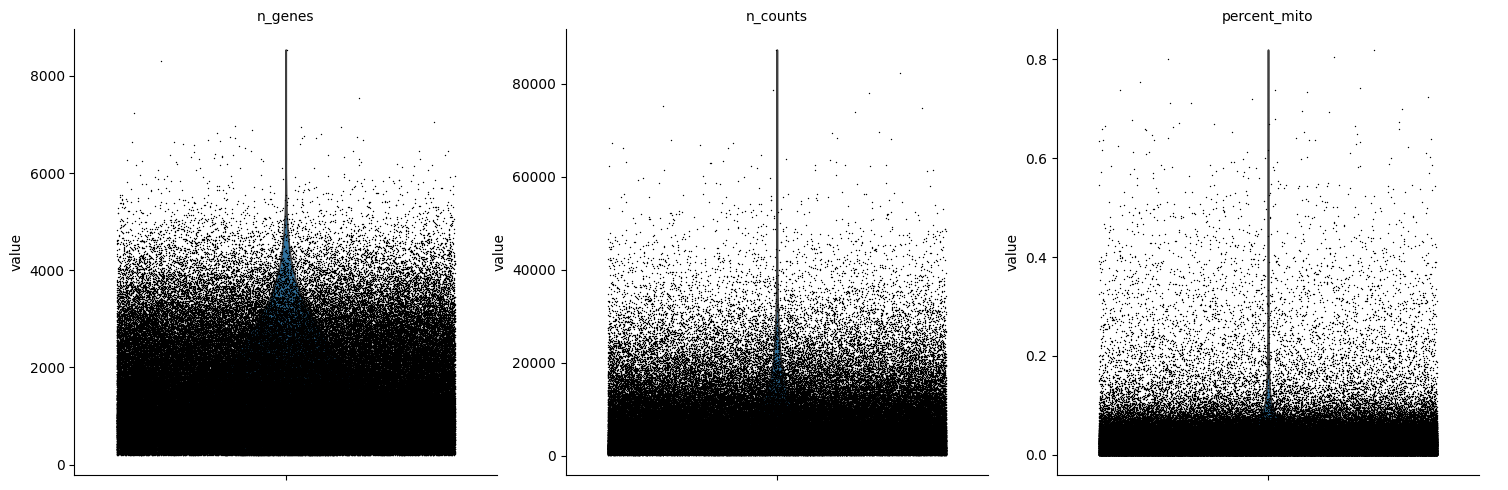

In [29]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

In [10]:
#adata.write_h5ad('/lustre/scratch126/cellgen/team298/ab72/CTCL/ctcl_cellbender_raw_dbrmv_9_5.h5ad')

In [28]:
adata

AnnData object with n_obs × n_vars = 312708 × 29789
    obs: 'sample_type', 'Donor', 'Sanger_ID', 'batch', 'n_counts', 'donor_lane', 'mad_prd', 'ds', 'mad_MED', 'mad_MAD', 'mad_thr', 'n_genes', 'percent_mito'
    var: 'gene_ids', 'feature_types', 'n_cells'

In [28]:
adata = adata[adata.obs['n_genes'] < 6000, :]
adata = adata[adata.obs['n_genes'] > 400, :]
adata = adata[adata.obs['n_counts'] > 1000, :]
adata = adata[adata.obs['percent_mito'] < 0.2, :]

In [29]:
adata.write_h5ad('/lustre/scratch126/cellgen/team298/ab72/CTCL/ctcl_cellbender_raw_dbrmv_QCfiltered_17_5.h5ad')